# DSC540 Final Project

Depaul University <br> Emmanuel Akanbi

# Introduction

Stroke is the 5th cause of death in the Unied States. A stroke occurs when a blood vessel that carries oxygen to the brain is either blocked by a clot or bursts. As a result, part of the brain cannot recieve oxygen and blood so it and the brain cells die. In this notebook a dataset will be used to predict whether a patient is likely to have a stroke based on these attributes.
<br> Reference: https://www.nhs.uk/conditions/stroke/

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

Dataset Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

In [402]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics


In [403]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [404]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


It's unusual to have a minimum age of 0.08

In [405]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


bmi has missing values. Will convert age column to numeric.

<AxesSubplot:xlabel='age', ylabel='Count'>

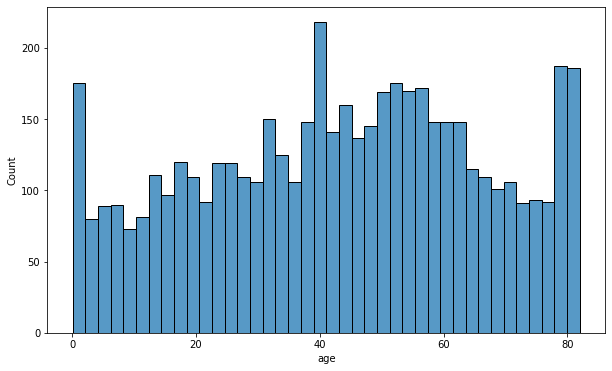

In [406]:
plt.figure(figsize=(10,6))
sns.histplot(data=stroke, x="age", bins=40)

Seems fairly uniform. There's also a lot of rows with ages of young children which may be removed.

<AxesSubplot:xlabel='count', ylabel='gender'>

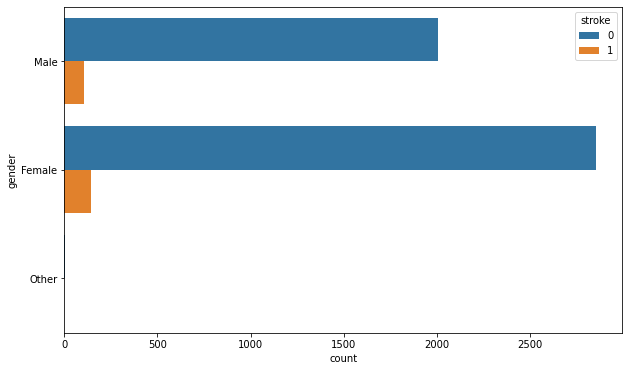

In [407]:
plt.figure(figsize=(10,6))
sns.countplot(data=stroke, y = "gender", hue = "stroke")

Seems more females with stroke than males

In [408]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

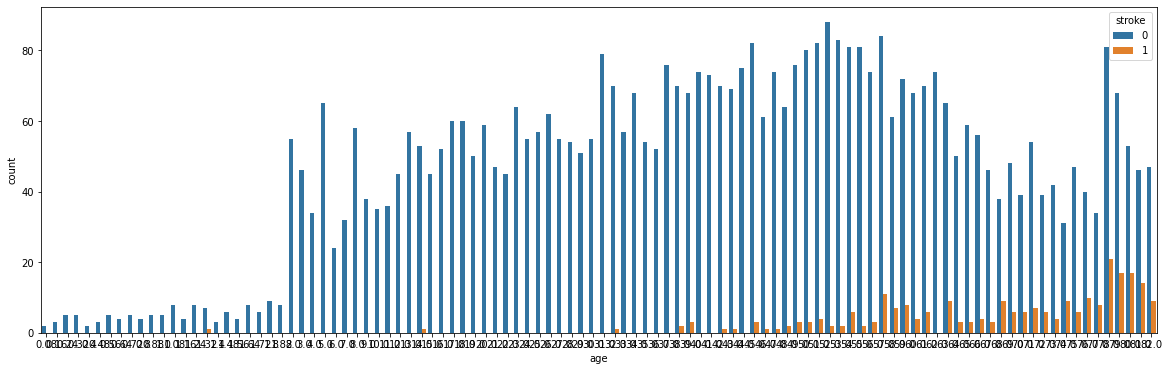

In [409]:
plt.figure(figsize=(20,6))
sns.countplot(data=stroke, x = "age", hue = "stroke")

It appears that strokes have started at age 14. May remove rows less than age 14 to help with the imbalance of strokes class

# Data Cleaning

In [410]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There seems to be a lot of variables with the oject data type. Dummy variables will need to be used.

In [411]:
#convert age to integer
stroke = stroke.astype({'age':'int64'})
stroke.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [412]:
#drop missing values
stroke = stroke.dropna()
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [413]:
#drop rows with ages less than 0 and genders that are classified as other 
stroke_new = stroke[(stroke['age']>15) & (stroke['gender']!='Other')]


According to the CDC the one in seven strokes occur in adolescents and young adults ages from 15 to 49. So ages less than 15 has been removed
<br> Reference: https://www.cdc.gov/stroke/risk_factors.htm#:~:text=The%20older%20you%20are%2C%20the,65%20years%20also%20have%20strokes.

In [414]:
stroke_new['stroke'].value_counts()

0    3973
1     208
Name: stroke, dtype: int64

In [415]:
stroke_new.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000
mean,37194.255920,49.036833,0.107869,0.057881,107.215932,30.359842,0.049749
std,20987.527253,18.343691,0.310252,0.233546,46.538214,7.327089,0.217452
min,84.000000,16.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,18888.000000,34.000000,0.000000,0.000000,77.290000,25.300000,0.000000
50%,37726.000000,49.000000,0.000000,0.000000,92.060000,29.100000,0.000000
75%,55351.000000,63.000000,0.000000,0.000000,114.920000,34.100000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:xlabel='count', ylabel='stroke'>

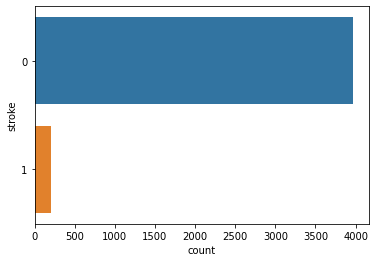

In [416]:
sns.countplot(stroke_new, y='stroke')

# Categorical Features

In [417]:
stroke_new.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [418]:
cat_feats = ['gender','ever_married','work_type','Residence_type','smoking_status']
stroke_new = pd.get_dummies(stroke_new, columns=cat_feats, drop_first=False)

In [419]:
stroke_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4181 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4181 non-null   int64  
 1   age                             4181 non-null   int64  
 2   hypertension                    4181 non-null   int64  
 3   heart_disease                   4181 non-null   int64  
 4   avg_glucose_level               4181 non-null   float64
 5   bmi                             4181 non-null   float64
 6   stroke                          4181 non-null   int64  
 7   gender_Female                   4181 non-null   uint8  
 8   gender_Male                     4181 non-null   uint8  
 9   ever_married_No                 4181 non-null   uint8  
 10  ever_married_Yes                4181 non-null   uint8  
 11  work_type_Govt_job              4181 non-null   uint8  
 12  work_type_Never_worked          41

In [420]:
stroke_new.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


# Train Test Split

In [421]:
from sklearn.model_selection import train_test_split

In [422]:
X = stroke_new.drop(['id','stroke'],axis=1)
y = stroke_new['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)

<AxesSubplot:>

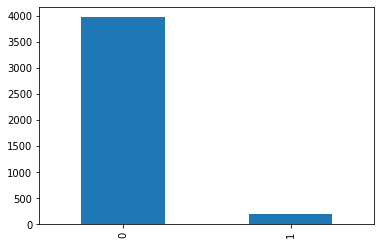

In [423]:
y.value_counts().plot(kind='bar')

<AxesSubplot:>

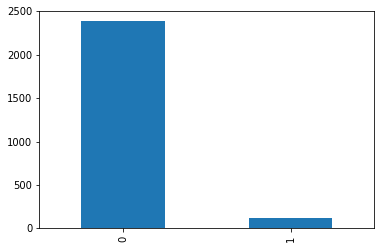

In [424]:
y_train.value_counts().plot(kind='bar')

In [425]:
y_train.value_counts(normalize=True)

0    0.950159
1    0.049841
Name: stroke, dtype: float64

In [426]:
y_test.value_counts(normalize=True)

0    0.950389
1    0.049611
Name: stroke, dtype: float64

In [427]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Functions

In [428]:
#accuracy score
def accuracy(pred, true):
    return metrics.accuracy_score(pred, true)

#f1 score
def f1(pred, true):
    return metrics.f1_score(pred, y_test, average='weighted', labels=np.unique(pred))

#precision score
def precision(pred, true):
    return metrics.precision_score(pred, y_test, average='weighted', labels=np.unique(pred))

In [429]:
def confusion_matrix(true, pred):
    confusion_matrix =  pd.crosstab(index = true, columns=pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    plt.title("Classification Matrix Test Set", fontsize = 15)
    plt.show()

In [430]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylim(-1, n_features)

# Random Forest Model

In [431]:
from sklearn.ensemble import RandomForestClassifier

In [432]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

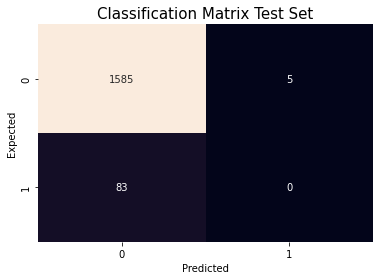

In [433]:
confusion_matrix(y_test, pred_test_rf)

In [434]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1590
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1673
   macro avg       0.48      0.50      0.49      1673
weighted avg       0.90      0.95      0.92      1673



# RandomForest with GridSearch

In [435]:
# Creating the parameters

# Number of tree in the random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20, 30, 40]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 4)]
max_depth.append(None)

# Create the dictionary
params = dict(n_estimators = n_estimators,
min_samples_split=min_samples_split,max_depth=max_depth)
params

{'n_estimators': [20, 40, 60, 80, 100],
 'min_samples_split': [5, 10, 20, 30, 40],
 'max_depth': [2, 4, 7, 10, None]}

In [436]:
gs = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )
gs.fit(X_train,y_train)
best_estimator_rf = gs.best_estimator_
pred_test_rf = best_estimator_rf.predict(X_test)
best_estimator_rf

RandomForestClassifier(min_samples_split=5, n_estimators=20)

In [437]:
print(metrics.classification_report(y_test, pred_test_rf, zero_division=True))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1590
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1673
   macro avg       0.48      0.50      0.49      1673
weighted avg       0.90      0.95      0.93      1673



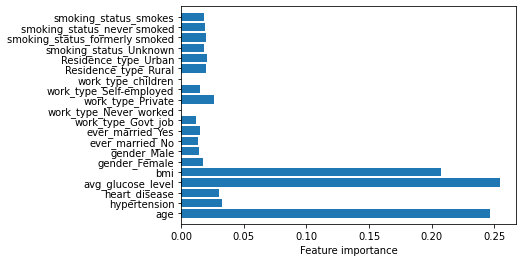

In [438]:
plot_feature_importances(best_estimator_rf, df=X)

# K-Nearest Neighbor model

In [439]:
from sklearn.neighbors import KNeighborsClassifier

In [440]:
knn = KNeighborsClassifier(n_neighbors=1)

In [441]:
knn.fit(X_train, y_train) 
pred_train_knn = knn.predict(X_train) 
pred_test_knn = knn.predict(X_test)

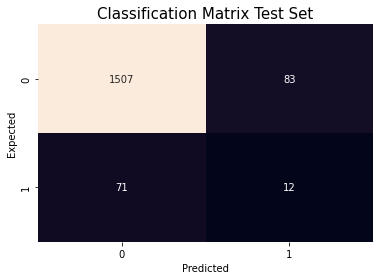

In [442]:
confusion_matrix(y_test, pred_test_knn)

In [443]:
print(metrics.classification_report(y_test, pred_test_knn))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1590
           1       0.13      0.14      0.13        83

    accuracy                           0.91      1673
   macro avg       0.54      0.55      0.54      1673
weighted avg       0.91      0.91      0.91      1673



# K-Nearest Neighbors with GridSearch

In [444]:

n_neighbors = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]

leaf_size = [5, 10, 20, 30, 40]

weights = ['uniform', 'distance']
metric = ['minkowski', 'chebyshev']
p= [1,2]

parameters_KNN = {
    'n_neighbors': n_neighbors,
    'leaf_size': leaf_size,
    'p': p,
    'weights': weights,
    'metric': metric,}

parameters_KNN

{'n_neighbors': [20, 40, 60, 80, 100],
 'leaf_size': [5, 10, 20, 30, 40],
 'p': [1, 2],
 'weights': ['uniform', 'distance'],
 'metric': ['minkowski', 'chebyshev']}

In [445]:
gs = GridSearchCV(estimator=knn, param_grid=parameters_KNN, scoring='f1', cv=cv, n_jobs=-1, )
gs.fit(X_train,y_train)
best_estimator_knn = gs.best_estimator_
pred_test_knn = best_estimator_knn.predict(X_test)
best_estimator_knn

KNeighborsClassifier(leaf_size=5, n_neighbors=20, p=1)

In [446]:
print(metrics.classification_report(y_test, pred_test_knn, zero_division=True))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1590
           1       1.00      0.00      0.00        83

    accuracy                           0.95      1673
   macro avg       0.98      0.50      0.49      1673
weighted avg       0.95      0.95      0.93      1673



# Adaboost Model


In [447]:
from sklearn.ensemble import AdaBoostClassifier

In [448]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
pred_train_ada = rf.predict(X_train)
pred_test_ada = rf.predict(X_test)

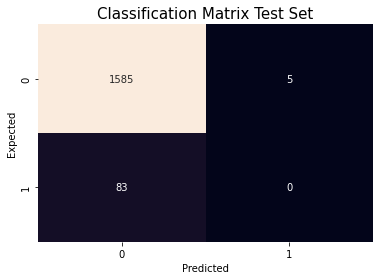

In [449]:
confusion_matrix(y_test, pred_test_ada)

In [450]:
print(metrics.classification_report(y_test, pred_test_ada, zero_division=True))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1590
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1673
   macro avg       0.48      0.50      0.49      1673
weighted avg       0.90      0.95      0.92      1673



# AdaBoost with GridSearch

In [451]:
# Number of tree in the adaboost
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
# learning rate
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0]
# Create the dictionary
params_ada = dict(n_estimators = n_estimators,
learning_rate=learning_rate)
params_ada

{'n_estimators': [20, 40, 60, 80, 100],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

In [452]:
gs = GridSearchCV(estimator=ada, param_grid=params_ada, scoring='f1', cv=cv, n_jobs=-1, )
gs.fit(X_train,y_train)
best_estimator_ada = gs.best_estimator_
pred_test_ada = best_estimator_ada.predict(X_test)
best_estimator_ada

AdaBoostClassifier(n_estimators=60)

In [453]:
print(metrics.classification_report(y_test, pred_test_ada, zero_division=True))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1590
           1       0.25      0.01      0.02        83

    accuracy                           0.95      1673
   macro avg       0.60      0.51      0.50      1673
weighted avg       0.92      0.95      0.93      1673



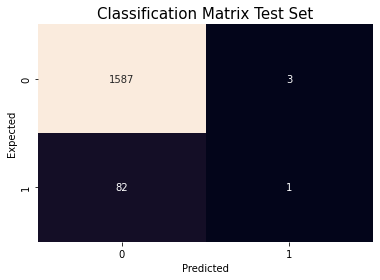

In [454]:
confusion_matrix(y_test, pred_test_ada)

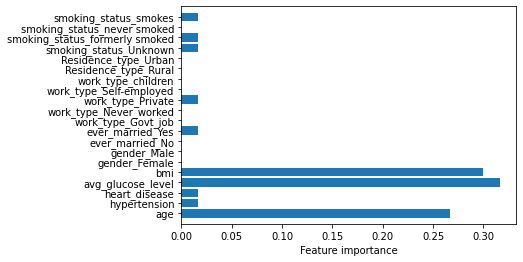

In [463]:
plot_feature_importances(best_estimator_ada, df=X)

# GradientBoost

In [455]:
from sklearn.ensemble import GradientBoostingClassifier

In [456]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
pred_train_gb = rf.predict(X_train)
pred_test_gb = rf.predict(X_test)

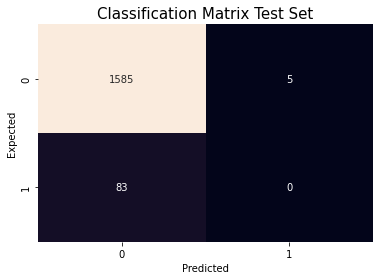

In [457]:
confusion_matrix(y_test, pred_test_gb)

In [458]:
print(metrics.classification_report(y_test, pred_test_gb, zero_division = True))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1590
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1673
   macro avg       0.48      0.50      0.49      1673
weighted avg       0.90      0.95      0.92      1673



# GradientBoost with GridSearch

In [459]:
# Creating the parameters

# Number of tree in the adaboost
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
# learning rate
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0]



# Create the dictionary
params_gb = dict(n_estimators = n_estimators,
learning_rate=learning_rate)
params_gb

{'n_estimators': [20, 40, 60, 80, 100],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

In [460]:
gs = GridSearchCV(estimator=gb, param_grid=params_gb, scoring='f1', cv=cv, n_jobs=-1, )
gs.fit(X_train,y_train)
best_estimator_gb = gs.best_estimator_
pred_train_gb = best_estimator_gb.predict(X_train)
pred_test_gb = best_estimator_gb.predict(X_test)
best_estimator_gb

GradientBoostingClassifier(learning_rate=1.0, n_estimators=40)

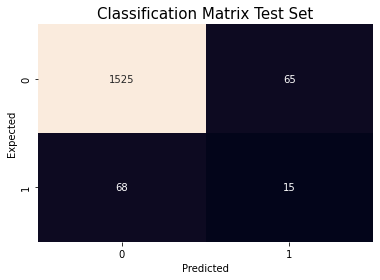

In [461]:
confusion_matrix(y_test, pred_test_gb)

In [465]:
print(metrics.classification_report(y_test, pred_test_gb, zero_division = True))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1590
           1       0.19      0.18      0.18        83

    accuracy                           0.92      1673
   macro avg       0.57      0.57      0.57      1673
weighted avg       0.92      0.92      0.92      1673



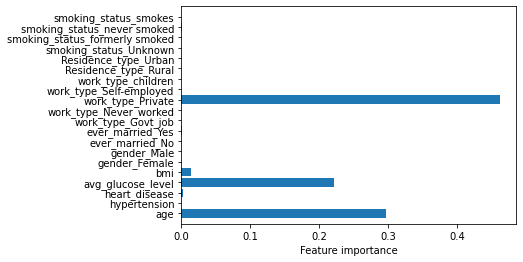

In [464]:
plot_feature_importances(best_estimator_gb, df=X)

In [462]:
summary = {'Model':['Random Forest','K-Nearest Neighbor','Ada Boost', 'Gradient Boosting' ],
'Accuracy':[accuracy(pred_test_rf, y_test), accuracy(pred_test_knn, y_test),accuracy(pred_test_ada, y_test), accuracy(pred_test_gb, y_test)],
'F1_Score': [f1(pred_test_rf, y_test), f1(pred_test_knn, y_test), f1(pred_test_ada, y_test), f1(pred_test_gb, y_test)],
'Precision':[precision(pred_test_rf, y_test), precision(pred_test_knn, y_test), precision(pred_test_ada, y_test), precision(pred_test_gb, y_test) ]
}

pd.DataFrame(summary)

,Model,Accuracy,F1_Score,Precision
0,Random Forest,0.949193,0.972770,0.997548
1,K-Nearest Neighbor,0.950389,0.974563,1.000000
2,Ada Boost,0.949193,0.971645,0.995756
3,Gradient Boosting,0.920502,0.921196,0.921898


After performing 4 machine learning algorithms, it is concluded that the best model is the AdaBoost model based off of the unweighted f1 scores in the in the classifaction reports. for the oher algorithms, the f1 score waseither close to 0 or 0. From looking at the feature of importance it seems that the random forest model determined that the that majority of the variable we important while the boost algorithms had only a small amount of variables. If more time was given the reason why the f1 score were so low would have been investigated. Other forms of sampling would also have been performed due to the imbalance of classes in the stroke variable. 